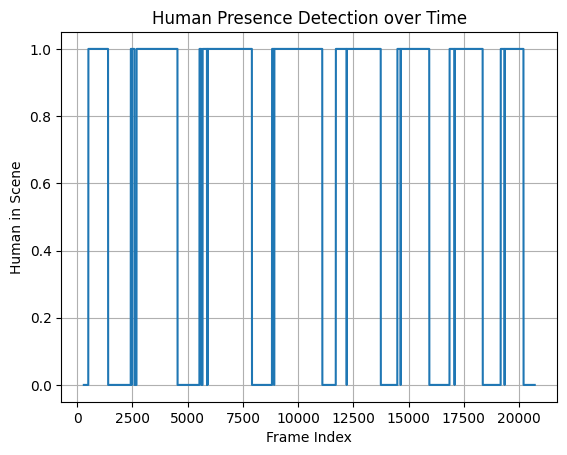

In [2]:
import pickle as pkl

# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result.pkl
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result.pkl', 'rb') as f:
    detection_result = pkl.load(f)
# entry format: return_dict = {"human_in_scene": False, "bed_exit": False, "Frame index": idx}
# plot human_in_scene against idx
# detection_result = detection_result[2000:6000]
import matplotlib.pyplot as plt
frame_indices = [d['Frame index'] for d in detection_result]
human_in_scene = [d['human_in_scene'] for d in detection_result]
plt.plot(frame_indices, human_in_scene)
plt.xlabel('Frame Index')
plt.ylabel('Human in Scene')
plt.title('Human Presence Detection over Time')
plt.grid()
plt.show()


In [3]:
# load /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml
import yaml
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml', 'r') as f:
    annotations = yaml.safe_load(f)

avg_dst = 0
for i in annotations['leave_bed']:
    min_dst = 10000000
    for j in detection_result:
        dst = abs(i - j['Frame index'])
        if dst < min_dst and j['bed_exit']:
            min_dst = dst
    avg_dst += min_dst
avg_dst /= len(annotations['leave_bed'])
print("Average frame difference for bed exit detection: ", avg_dst)

# 2.3 seconds

# presence detection accuracy
presence_intervals = []
for entry, exit in zip(annotations['entries'], annotations['exits']):
    presence_intervals.append((entry, exit))

total_frames = len(detection_result)
correct_detections = 0
for i in range(total_frames):
    frame_idx = detection_result[i]['Frame index']
    human_in_scene = detection_result[i]['human_in_scene']
    # check if frame_idx is within any entry-exit interval
    in_scene = False
    for entry, exit in presence_intervals:
        if entry <= frame_idx <= exit:
            in_scene = True
            break
    if in_scene == human_in_scene:
        correct_detections += 1
accuracy = correct_detections / total_frames * 100
print(f"Presence detection accuracy: {accuracy:.2f}%")


Average frame difference for bed exit detection:  22.25
Presence detection accuracy: 97.54%


In [4]:
# compare against the one without Kalman

# compare against the one without residual detection

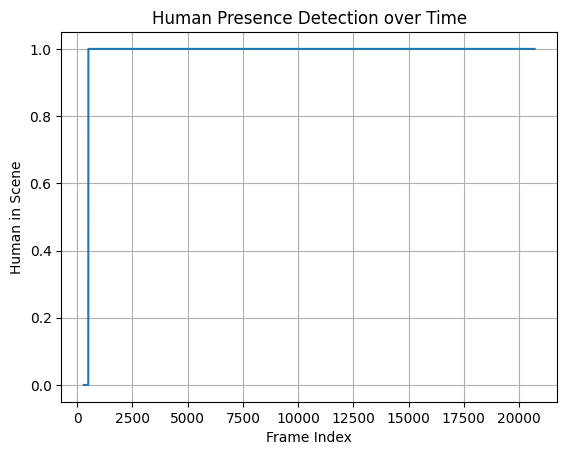

In [5]:
import pickle as pkl

# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl', 'rb') as f:
    detection_result = pkl.load(f)
# entry format: return_dict = {"human_in_scene": False, "bed_exit": False, "Frame index": idx}
# plot human_in_scene against idx
# detection_result = detection_result[2000:6000]
import matplotlib.pyplot as plt
frame_indices = [d['Frame index'] for d in detection_result]
human_in_scene = [d['human_in_scene'] for d in detection_result]
plt.plot(frame_indices, human_in_scene)
plt.xlabel('Frame Index')
plt.ylabel('Human in Scene')
plt.title('Human Presence Detection over Time')
plt.grid()
plt.show()

In [7]:
# load /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml
import yaml
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml', 'r') as f:
    annotations = yaml.safe_load(f)

avg_dst = 0
for i in annotations['leave_bed']:
    min_dst = 10000000
    for j in detection_result:
        dst = abs(i - j['Frame index'])
        if dst < min_dst and j['bed_exit']:
            min_dst = dst
    avg_dst += min_dst
avg_dst /= len(annotations['leave_bed'])
print("Average frame difference for bed exit detection: ", avg_dst)

# 2.3 seconds

# presence detection accuracy
presence_intervals = []
for entry, exit in zip(annotations['entries'], annotations['exits']):
    presence_intervals.append((entry, exit))

total_frames = len(detection_result)
correct_detections = 0
for i in range(total_frames):
    frame_idx = detection_result[i]['Frame index']
    human_in_scene = detection_result[i]['human_in_scene']
    # check if frame_idx is within any entry-exit interval
    in_scene = False
    for entry, exit in presence_intervals:
        if entry <= frame_idx <= exit:
            in_scene = True
            break
    if in_scene == human_in_scene:
        correct_detections += 1
accuracy = correct_detections / total_frames * 100
print(f"Presence detection accuracy: {accuracy:.2f}%")


Average frame difference for bed exit detection:  10000000.0
Presence detection accuracy: 67.66%


In [8]:
# compare contents of kalman_detection_result.pkl and kalman_detection_result_noKalman.pkl
import pickle as pkl
# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl', 'rb') as f:
    detection_result_noKalman = pkl.load(f)
# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result.pkl', 'rb') as f:
    detection_result = pkl.load(f)
# compare detection results frame by frame
differences = []
for dr1, dr2 in zip(detection_result, detection_result_noKalman):
    if dr1['human_in_scene'] != dr2['human_in_scene'] or dr1['bed_exit'] != dr2['bed_exit']:
        differences.append((dr1['Frame index'], dr1, dr2))
print(f"Total differing frames: {len(differences)}")

Total differing frames: 6713


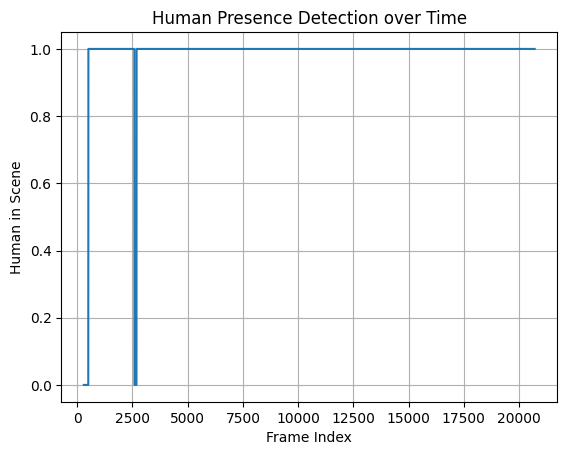

In [9]:
import pickle as pkl

# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noResDet.pkl', 'rb') as f:
    detection_result = pkl.load(f)
# entry format: return_dict = {"human_in_scene": False, "bed_exit": False, "Frame index": idx}
# plot human_in_scene against idx
# detection_result = detection_result[2000:6000]
import matplotlib.pyplot as plt
frame_indices = [d['Frame index'] for d in detection_result]
human_in_scene = [d['human_in_scene'] for d in detection_result]
plt.plot(frame_indices, human_in_scene)
plt.xlabel('Frame Index')
plt.ylabel('Human in Scene')
plt.title('Human Presence Detection over Time')
plt.grid()
plt.show()

In [10]:
# load /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml
import yaml
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml', 'r') as f:
    annotations = yaml.safe_load(f)

avg_dst = 0
for i in annotations['leave_bed']:
    min_dst = 10000000
    for j in detection_result:
        dst = abs(i - j['Frame index'])
        if dst < min_dst and j['bed_exit']:
            min_dst = dst
    avg_dst += min_dst
avg_dst /= len(annotations['leave_bed'])
print("Average frame difference for bed exit detection: ", avg_dst)

# 2.3 seconds

# presence detection accuracy
presence_intervals = []
for entry, exit in zip(annotations['entries'], annotations['exits']):
    presence_intervals.append((entry, exit))

total_frames = len(detection_result)
correct_detections = 0
for i in range(total_frames):
    frame_idx = detection_result[i]['Frame index']
    human_in_scene = detection_result[i]['human_in_scene']
    # check if frame_idx is within any entry-exit interval
    in_scene = False
    for entry, exit in presence_intervals:
        if entry <= frame_idx <= exit:
            in_scene = True
            break
    if in_scene == human_in_scene:
        correct_detections += 1
accuracy = correct_detections / total_frames * 100
print(f"Presence detection accuracy: {accuracy:.2f}%")


Average frame difference for bed exit detection:  10000000.0
Presence detection accuracy: 67.19%


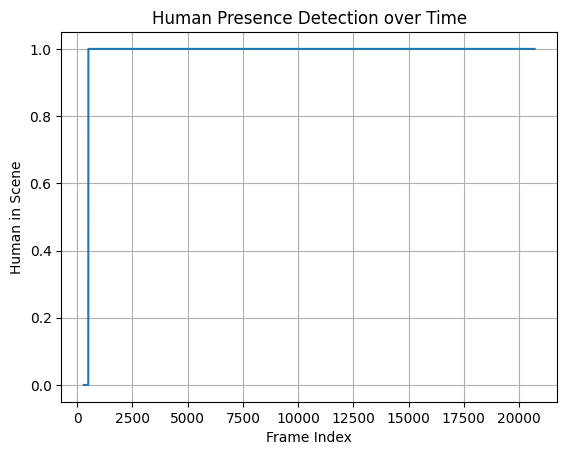

In [11]:
import pickle as pkl

# load pkl file: /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman.pkl
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/kalman_detection_result_noKalman_noResDet.pkl', 'rb') as f:
    detection_result = pkl.load(f)
# entry format: return_dict = {"human_in_scene": False, "bed_exit": False, "Frame index": idx}
# plot human_in_scene against idx
# detection_result = detection_result[2000:6000]
import matplotlib.pyplot as plt
frame_indices = [d['Frame index'] for d in detection_result]
human_in_scene = [d['human_in_scene'] for d in detection_result]
plt.plot(frame_indices, human_in_scene)
plt.xlabel('Frame Index')
plt.ylabel('Human in Scene')
plt.title('Human Presence Detection over Time')
plt.grid()
plt.show()

In [12]:
# load /Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml
import yaml
with open('/Users/entomophile/Desktop/FYP/entry_exit_detection/presence_detection_workspace/data/hall1/annotation.yaml', 'r') as f:
    annotations = yaml.safe_load(f)

avg_dst = 0
for i in annotations['leave_bed']:
    min_dst = 10000000
    for j in detection_result:
        dst = abs(i - j['Frame index'])
        if dst < min_dst and j['bed_exit']:
            min_dst = dst
    avg_dst += min_dst
avg_dst /= len(annotations['leave_bed'])
print("Average frame difference for bed exit detection: ", avg_dst)

# 2.3 seconds

# presence detection accuracy
presence_intervals = []
for entry, exit in zip(annotations['entries'], annotations['exits']):
    presence_intervals.append((entry, exit))

total_frames = len(detection_result)
correct_detections = 0
for i in range(total_frames):
    frame_idx = detection_result[i]['Frame index']
    human_in_scene = detection_result[i]['human_in_scene']
    # check if frame_idx is within any entry-exit interval
    in_scene = False
    for entry, exit in presence_intervals:
        if entry <= frame_idx <= exit:
            in_scene = True
            break
    if in_scene == human_in_scene:
        correct_detections += 1
accuracy = correct_detections / total_frames * 100
print(f"Presence detection accuracy: {accuracy:.2f}%")


Average frame difference for bed exit detection:  10000000.0
Presence detection accuracy: 67.66%


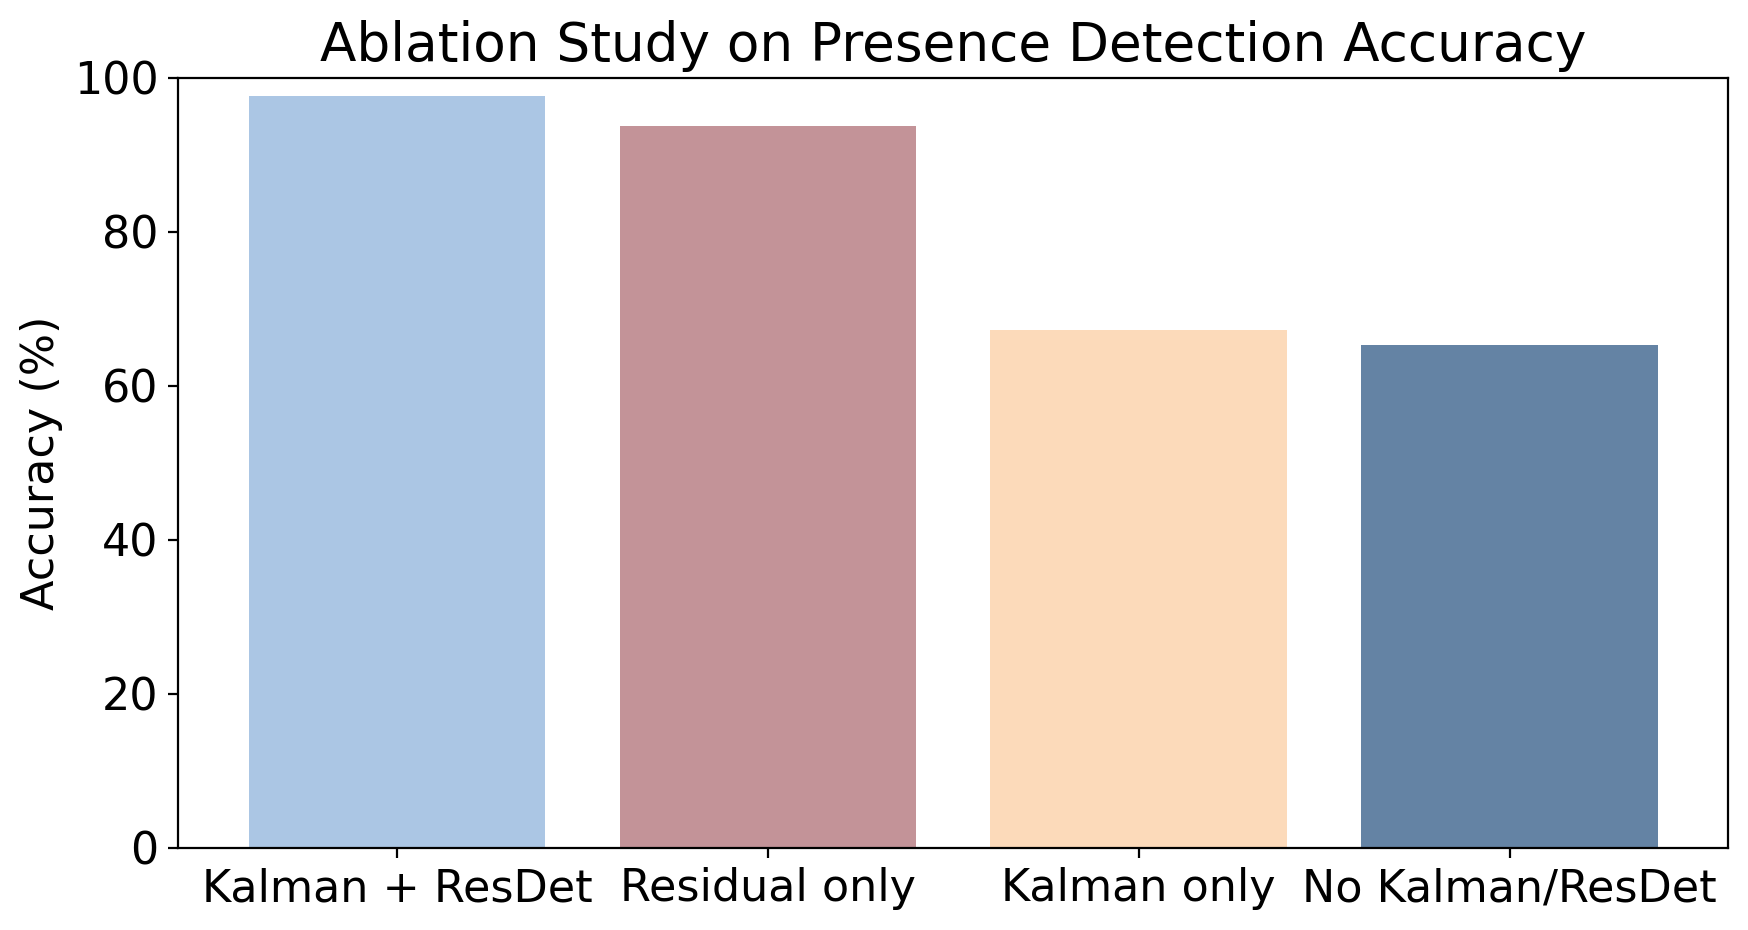

In [13]:
# Draw histogram to show ablation study results
# Kalman + Residual Detection: 97.54%
# Kalman only: 67.19%
# Residual only: 93.76%
# No residual, no Kalman:  65.32%
plt.rcParams.update({'pdf.fonttype': 42})
plt.rcParams.update({'ps.fonttype': 42})
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 5), dpi=200)

import matplotlib.pyplot as plt
labels = ['Kalman + ResDet', 'Residual only', 'Kalman only', 'No Kalman/ResDet']
accuracies = [97.54, 93.76, 67.19, 65.32]
plt.bar(labels, accuracies, color = ["#ABC6E4", "#C39398", "#FCDABA", "#6483A4"])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Ablation Study on Presence Detection Accuracy')
plt.show()